In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'http://bit.ly/w-data'
student_data = pd.read_csv(url)
student_data.head(20)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


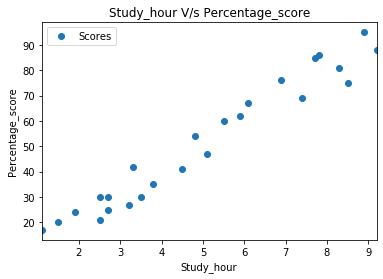

In [9]:
student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Study_hour V/s Percentage_score')
plt.xlabel('Study_hour')
plt.ylabel('Percentage_score')
plt.show()

In [10]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression

In [15]:
Regression_1 = LinearRegression()
Regression_1.fit(x,y)
print("Training_model")

Training_model


In [16]:
line = Regression_1.coef_*x + Regression_1.intercept_


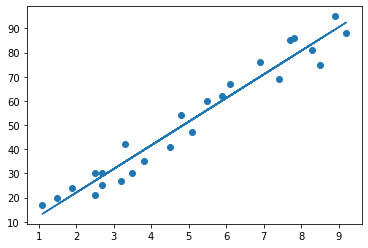

In [18]:
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

# Prediction

In [20]:
print(x_test)
y_pred = Regression_1.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [23]:
print("training score ", Regression_1.score(x_train, y_train))
print("Testing score ", Regression_1.score(x_test, y_test))

training score  0.9512837351709387
Testing score  0.9491748734859171


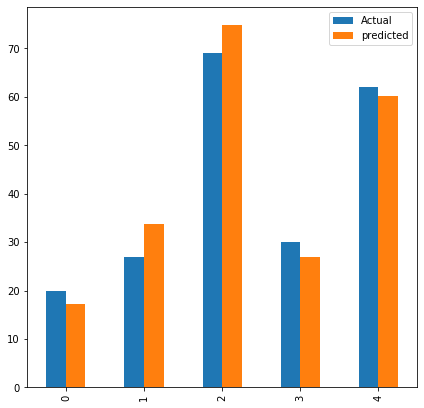

In [26]:
df.plot(kind= 'bar', figsize = (7,7))
plt.show()

# prediction for 9.25hrs

In [32]:
hours_number = 9.25
test = np.array([hours_number])
test = test.reshape(-1, 1)
our_pred = Regression_1.predict(test)
print(f"No. of hours = {hours_number}")
print(f"predicted score= {our_pred[0]}")


No. of hours = 9.25
predicted score= 92.90985477015731


# Model evaluation

In [37]:
import numpy as np
from sklearn import metrics
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explain variance score', metrics.explained_variance_score(y_test,y_pred))

Mean Absolute error:  4.071877793635608
Mean squared error:  20.1389481299402
Root mean squared error 4.487643939746134
Explain variance score 0.951522433518808
